# Visualizing the DFT

This notebook demonstrates a couple of ways to visualize the DFT and also shows how to do the FFT in `numpy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes', labelsize=16)

## Plotting Complex Sinusoids

First, we will visualize a complex sinusoid:

$$z_k[n] = e^{i \omega_0 n k},$$

where remember $\omega_0 = \frac{2\pi}{L}$. Recall that the DFT is breaking a signal $x[n]$ down into a summation of such sinusoids, each weighted by a complex coefficient, $X[k]$. Below, we are plotting $z_k[n]$ as a function of $n$. This is a 3D plot because we have time ($n$), a real component, and an imaginary component of $z_k[n]$ to plot. As you can see, the result is a helix that comes from the rotation around the unit circle as we progress in time. You can change the value of $k$ below to get higher frequency twists in the helix (you can also change the $L$ if you want to see more samples in time).

<IPython.core.display.Javascript object>


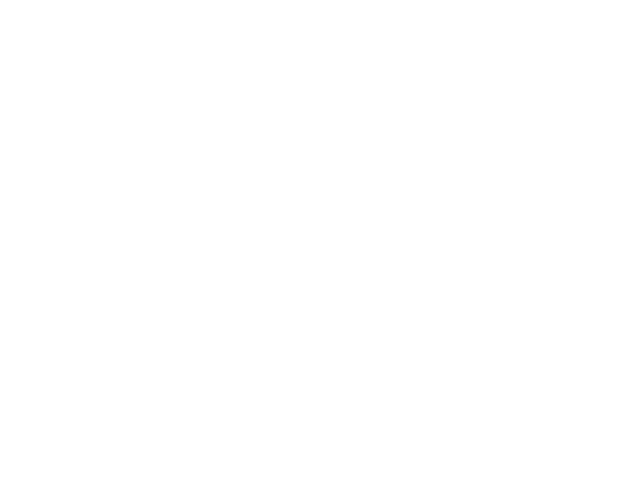

In [2]:
%matplotlib notebook

ax = plt.figure().add_subplot(projection='3d')

L = 40
k = 1

n = np.linspace(0, L, L)
impart = np.sin(n * 2 * k * np.pi / L)
repart = np.cos(n * 2 * k * np.pi / L)

ax.plot(xs = n, ys = repart, zs = np.zeros_like(n) - 1, zdir = 'z', label = 'real component', marker = 'o')
ax.plot(xs = n, ys = np.ones_like(n), zs = impart, zdir = 'z', label = 'imaginary component', marker = 'o')
ax.plot(xs = n, ys = repart, zs = impart, zdir = 'z', label = 'complex sinusoid', marker = 'o', color = 'black')
ax.plot(xs = [0, L], ys = [0, 0], zs = [0, 0], color = 'black')
for i in range(L):
    ax.plot(xs = [n[i], n[i]], ys = [0, repart[i]], zs = [0, impart[i]], color = 'black')

ax.legend()
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('n')
ax.set_ylabel('Real')
ax.set_zlabel('Imag')

plt.show()

## Plotting the DFT Synthesis of the Unit Impulse

The next visualization shows the DFT synthesis of the unit impulse, $\delta[n]$, up to `max_k` number of frequencies. So, if you change the value of `max_k`, you can see how the complex sinusoids add up. Eventually, if you go to `max_k = L`, you will see that all of the sinusoids cancel each other out past $n = 0$ in both the real and imaginary component, while they add up to 1.0 for $n = 0$.

<IPython.core.display.Javascript object>


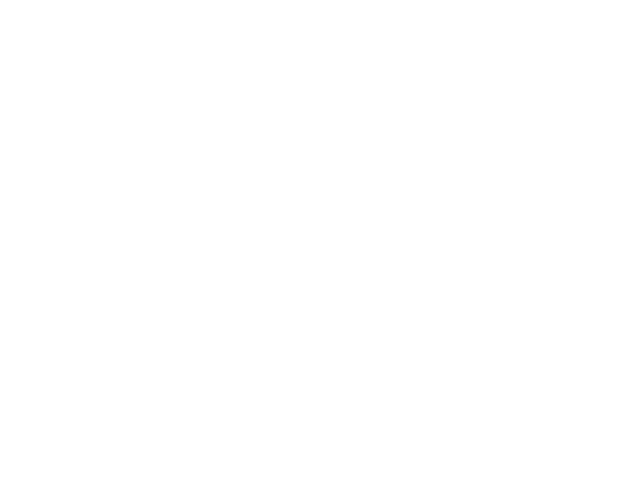

In [3]:
ax = plt.figure().add_subplot(projection='3d')

L = 10
max_k = 1

n = np.arange(0, L)

# Now we are going to look at the sum
impart = np.zeros_like(n)
repart = np.zeros_like(n)
for k in range(max_k + 1):
    impart = impart + (1 / L) * np.sin(n * 2 * k * np.pi / L)
    repart = repart + (1 / L) * np.cos(n * 2 * k * np.pi / L)

ax.plot(xs = n, ys = np.ones_like(n), zs = impart, zdir = 'z', label = 'imaginary component', marker = 'o')
ax.plot(xs = n, ys = repart, zs = np.zeros_like(n)-1, zdir = 'z', label = 'imaginary component', marker = 'o')
ax.plot(xs = n, ys = repart, zs = impart, zdir = 'z', label = 'complex sinusoid', marker = 'o', color = 'black')
ax.plot(xs = [0,L], ys = [0,0], zs = [0,0], color = 'black')
for i in range(L):
    ax.plot(xs = [n[i], n[i]], ys = [0,repart[i]], zs = [0,impart[i]], color = 'black')

#ax.legend()
ax.set_zticks(np.linspace(-1, 1, 5))
ax.set_yticks(np.linspace(-1, 1, 5))
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('n')
ax.set_ylabel('Real')
ax.set_zlabel('Imag')

plt.show()

## Visualizing Complex DFT in a 2D Plot

Next we'll do a simpler plot where the real and imaginary components are both plotted on the same 2D plot, but in different colors.

In [4]:
%matplotlib inline

def plot_signal(x, ax, xlabel = "$n$", ylabel = "$x[n]$"):
    if x.dtype == 'complex128':
        ax.stem(np.real(x), basefmt = '', label = 'real')
        ax.stem(np.imag(x), linefmt = 'C1-', basefmt = '', label = 'imag')
        ax.legend()
    else:
        ax.stem(x, basefmt='')

    L = x.size
    n = np.arange(L)

    ax.set_xticks(n)
    ax.set_facecolor((0.9,0.9,0.9))
    ax.grid(color = 'white')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_dft_pair(x):
    dft_x = np.fft.fft(x, norm = 'ortho')

    fig, ax = plt.subplots(1, 2, figsize = (12,4))
    plot_signal(x, ax[0])
    plot_signal(dft_x, ax[1], xlabel = "$k$", ylabel = "$X[k]$")
    plt.show()

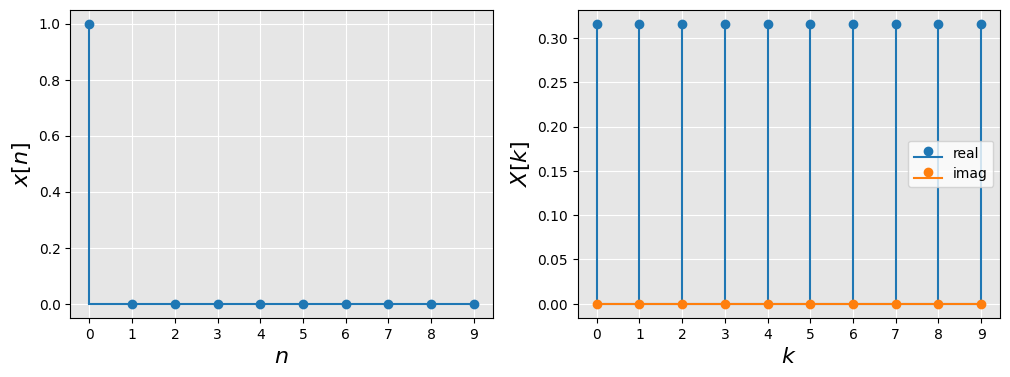

In [5]:
delta = np.zeros(10)
delta[0] = 1.0

plot_dft_pair(delta)

## Demonstration of DFT of a Box Signal (Rectangular Pulse)

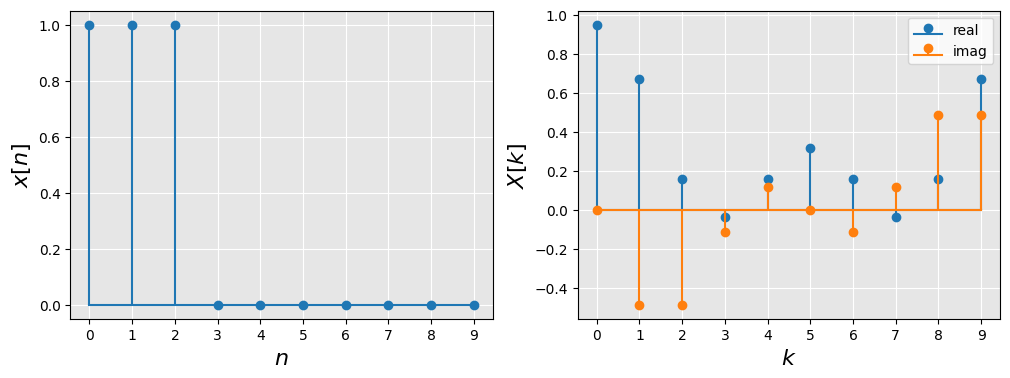

In [6]:
box = np.zeros(10)
box[0:3] = 1.0

plot_dft_pair(box)

## Convolution of a Box with Itself is a Triangle Pulse

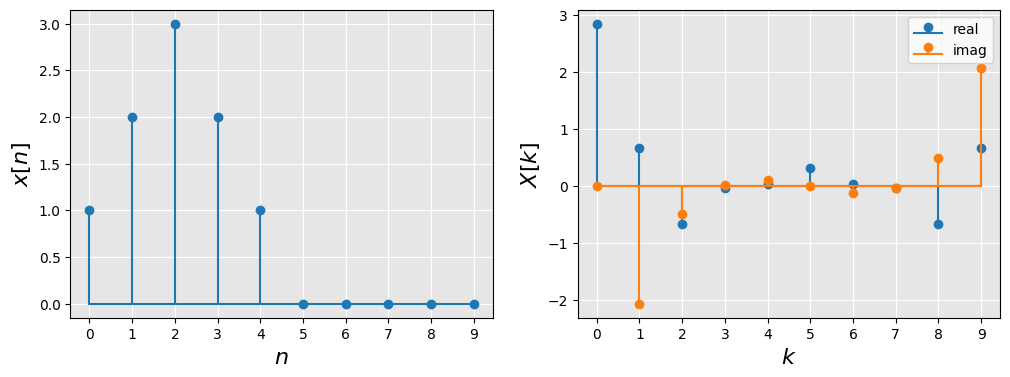

In [7]:
box2 = np.convolve(box, box)[0:10]

plot_dft_pair(box2)

## Seeing that Convolution in Time Domain is Multiplication in Frequency Domain

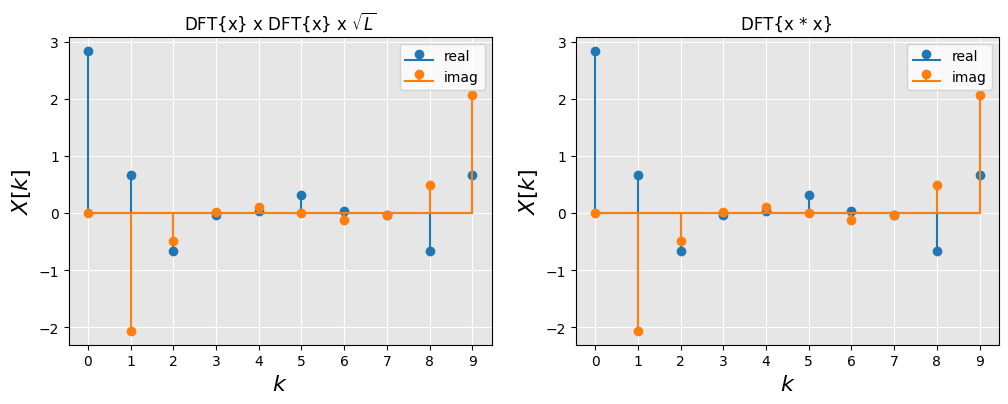

In [8]:
dft_box = np.fft.fft(box, norm = 'ortho')

fig, ax = plt.subplots(1, 2, figsize = (12,4))

plot_signal(dft_box * dft_box * np.sqrt(10), ax[0], xlabel = "$k$", ylabel = "$X[k]$")
ax[0].set_title("DFT{x} x DFT{x} x $\sqrt{L}$")
plot_signal(np.fft.fft(box2, norm = 'ortho'), ax[1], xlabel = "$k$", ylabel = "$X[k]$")
ax[1].set_title("DFT{x * x}")
plt.show()